Backpropagation


In this assignment, you will implement Backpropagation from scratch. You will then verify the correctness of the your implementation using a "grader" function/cell (provided by us) which will match your implmentation.

The grader fucntion would help you validate the correctness of your code. 

Please submit the final Colab notebook in the classroom ONLY after you have verified your code using the grader function/cell.




Loading data.

In [1]:
from matplotlib import pyplot as plt
from matplotlib import style
from tqdm import tqdm

import numpy as np
import pickle

In [2]:
style.use(style='seaborn-deep')

In [3]:
with open(file='data.pkl', mode='rb') as f:
    data = pickle.load(f)

print(data.shape)
X = data[:, :5]
y = data[:, -1]
print(X.shape, y.shape)

(506, 6)
(506, 5) (506,)


In [4]:
print(data[0])

[-1.2879095  -0.12001342 -1.45900038 -0.66660821 -0.14421743  1.85884913]


Check this video for better understanding of the computational graphs and back propagation.

Reference: https://youtu.be/i94OvYb6noo.

Computational graph.

<img src='https://i.imgur.com/seSGbNS.png'>

If you observe the graph, we are having input features [f1, f2, f3, f4, f5] and 9 weights [w1, w2, w3, w4, w5, w6, w7, w8, w9].

The final output of this graph is a value $L$ which is computed as $(Y-Y^{'})^{2}$.

Task 1: Implementing Forward propagation, Backpropagation and Gradient checking.

Task 1.1

Forward propagation.


* Forward propagation (Write your code in<font color='blue'> def forward_propagation()</font>)<br><br>
* For easy debugging, we will break the computational graph into 3 parts.

    <font color='green'><b>Part 1</b></font></b>
    <img src='https://i.imgur.com/0xUaxy6.png'><br><br>
    <font color='green'><b>Part 2</b></font></b><br>
    <img src='https://i.imgur.com/J29pAJL.png'><br><br>
    <font color='green'><b>Part 3</b></font></b>
    <img src='https://i.imgur.com/vMyCsd9.png'>

In [5]:
def sigmoid(z):
    """
    In this function, we will compute the sigmoid(z).
    """
    return 1 / (1 + np.exp(-z))

In [6]:
def grader_sigmoid(x):
    val = sigmoid(z=x)
    assert(val == 0.8807970779778825)
    return True

grader_sigmoid(x=2)

True

In [7]:
def forward_propagation(x, y, w):
    """
    In this function, we will compute the forward propagation.
    """

    forward_dict = dict()

    p1_m1 = x[0] * w[0]
    forward_dict['o1_m1'] = p1_m1
    p1_m2 = x[1] * w[1]
    forward_dict['o1_m2'] = p1_m2
    p1_a1 = p1_m1 + p1_m2
    forward_dict['o1_a1'] = p1_a1
    p1_a2 = p1_m1 + p1_m2
    forward_dict['o1_a2'] = p1_a2
    p1_m3 = p1_a1 * p1_a2
    forward_dict['o1_m3'] = p1_m3
    p1_a3 = p1_m3 + w[5]
    forward_dict['o1_a3'] = p1_a3
    p1_exp = np.exp(p1_a3)
    forward_dict['o1_exp'] = p1_exp

    p2_a1 = p1_exp + w[6]
    forward_dict['o2_a1'] = p2_a1
    p2_tanh = np.tanh(p2_a1)
    forward_dict['o2_tanh'] = p2_tanh

    p3_m1 = x[2] * w[2]
    forward_dict['o3_m1'] = p3_m1
    p3_sin = np.sin(p3_m1)
    forward_dict['o3_sin'] = p3_sin
    p3_m2 = x[3] * w[3]
    forward_dict['o3_m2'] = p3_m2
    p3_m3 = x[4] * w[4]
    forward_dict['o3_m3'] = p3_m3
    p3_a1 = p3_m2 + p3_m3
    forward_dict['o3_a1'] = p3_a1
    p3_m4 = p3_sin * p3_a1
    forward_dict['o3_m4'] = p3_m4
    p3_a2 = p3_m4 + w[7]
    forward_dict['o3_a2'] = p3_a2
    p3_sigmoid = sigmoid(z=p3_a2)
    forward_dict['o3_sigmoid'] = p3_sigmoid

    p4_m1 = p3_sigmoid * w[8]
    forward_dict['o4_m1'] = p4_m1
    p4_a1 = p2_tanh + p4_m1
    forward_dict['o4_a1'] = p4_a1
    y_hat = p4_a1
    
    l = (y - y_hat) ** 2
    dl = (2 * (y - y_hat)) * (-1)

    forward_dict['exp'] = p1_exp
    forward_dict['sigmoid'] = p3_sigmoid
    forward_dict['tanh'] = p2_tanh
    forward_dict['loss'] = l
    forward_dict['dl'] = dl

    return forward_dict

In [8]:
def grader_forwardprop(data):
    dl = (data['dl'] == -1.9285278284819143)
    loss = (data['loss'] == 0.9298048963072919)
    part1 = (data['exp'] == 1.1272967040973583)
    part2 = (data['tanh'] == 0.8417934192562146)
    part3 = (data['sigmoid'] == 0.5279179387419721)
    assert (dl and loss and part1 and part2 and part3)
    return True

w = np.ones(9) * 0.1
d1 = forward_propagation(x=X[0], y=y[0], w=w)
grader_forwardprop(data=d1)

True

Task 1.2

Backward propagation.

Hand solved gradients.

![](https://user-images.githubusercontent.com/63338657/194126110-7144dfdd-7a09-44ae-9eea-4f06af359097.jpg)

![](https://user-images.githubusercontent.com/63338657/194126199-e94cb4b5-4b12-4c1a-b604-b3bcde6d1a4e.jpg)

![](https://user-images.githubusercontent.com/63338657/194126273-dce25da5-9728-46ee-8bea-6624ef70fad4.jpg)

![](https://user-images.githubusercontent.com/63338657/194126356-d4c26b15-2e4c-4690-8d34-90447a7dffda.jpg)

![](https://user-images.githubusercontent.com/63338657/194126442-ddffeb94-de50-419e-bb05-fc4b527e8b5c.jpg)

In [9]:
def backward_propagation(x, y, w, forward_dict):
    """
    In this function, we will compute the backward propagation.
    """
    backward_dict = dict()
    
    d_sigmoid = forward_dict['o3_sigmoid'] * (1 - forward_dict['o3_sigmoid'])
    
    dw1 = x[0] * 2 * forward_dict['o1_a1'] * forward_dict['o1_exp'] * (1 - (forward_dict['o2_tanh'] ** 2))
    dw2 = x[1] * 2 * forward_dict['o1_a1'] * forward_dict['o1_exp'] * (1 - (forward_dict['o2_tanh'] ** 2))
    dw3 = x[2] * forward_dict['o3_a1'] * w[8] * d_sigmoid * np.cos(forward_dict['o3_m1'])
    dw4 = x[3] * w[8] * d_sigmoid * forward_dict['o3_sin']
    dw5 = x[4] * w[8] * d_sigmoid * forward_dict['o3_sin']
    dw6 = forward_dict['o1_exp'] * (1 - (forward_dict['o2_tanh'] ** 2))
    dw7 = (1 - (forward_dict['o2_tanh'] ** 2))
    dw8 = w[8] * d_sigmoid
    dw9 = forward_dict['o3_sigmoid']
    
    backward_dict['dw1'] = forward_dict['dl'] * dw1
    backward_dict['dw2'] = forward_dict['dl'] * dw2
    backward_dict['dw3'] = forward_dict['dl'] * dw3
    backward_dict['dw4'] = forward_dict['dl'] * dw4
    backward_dict['dw5'] = forward_dict['dl'] * dw5
    backward_dict['dw6'] = forward_dict['dl'] * dw6
    backward_dict['dw7'] = forward_dict['dl'] * dw7
    backward_dict['dw8'] = forward_dict['dl'] * dw8
    backward_dict['dw9'] = forward_dict['dl'] * dw9
    
    return backward_dict

In [10]:
def grader_backprop(data):
    dw1 = (np.round(data['dw1'], 6) == -0.229733)
    dw2 = (np.round(data['dw2'], 6) == -0.021408)
    dw3 = (np.round(data['dw3'], 6) == -0.005625)
    dw4 = (np.round(data['dw4'], 6) == -0.004658)
    dw5 = (np.round(data['dw5'], 6) == -0.001008)
    dw6 = (np.round(data['dw6'], 6) == -0.633475)
    dw7 = (np.round(data['dw7'], 6) == -0.561942)
    dw8 = (np.round(data['dw8'], 6) == -0.048063)
    dw9 = (np.round(data['dw9'], 6) == -1.018104)
    assert (dw1 and dw2 and dw3 and dw4 and dw5 and dw6 and dw7 and dw8 and dw9)
    return True

w = np.ones(9) * 0.1
forward_dict = forward_propagation(x=X[0], y=y[0], w=w)
backward_dict = backward_propagation(x=X[0], y=y[0], w=w, forward_dict=forward_dict)
grader_backprop(data=backward_dict)

True

Task 1.3

 Gradient clipping.

Check this  <a href='https://towardsdatascience.com/how-to-debug-a-neural-network-with-gradient-checking-41deec0357a9'>blog link</a> for more details on Gradient clipping.

We know that the derivative of any function is

$$\lim_{\epsilon\to0}\frac{f(x+\epsilon)-f(x-\epsilon)}{2\epsilon}$$

*  The definition above can be used as a numerical approximation of the derivative. Taking an epsilon small enough, the calculated approximation will have an error in the range of epsilon squared. 

*  In other words, if epsilon is 0.001, the approximation will be off by 0.00001.

Therefore, we can use this to approximate the gradient, and in turn make sure that backpropagation is implemented properly. This forms the basis of <b>gradient checking!</b>

Gradient checking example.

<font >
Lets understand the concept with a simple example:
$f(w1,w2,x1,x2)=w_{1}^{2} . x_{1} + w_{2} . x_{2}$ 

From the above function , lets assume $w_{1}=1$, $w_{2}=2$, $x_{1}=3$, $x_{2}=4$ the gradient of $f$ w.r.t $w_{1}$ is
$$
\begin{array} {lcl}
\frac{df}{dw_{1}} = dw_{1} &=&2.w_{1}.x_{1} \\& = &2.1.3\\& = &6
\end{array}
$$

Let calculate the aproximate gradient of $w_{1}$ as mentinoned in the above formula and considering $\epsilon=0.0001$

$$
\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((1+0.0001)^{2} . 3 + 2 . 4) - ((1-0.0001)^{2} . 3 + 2 . 4)}{2\epsilon} \\ & = & \frac{(1.00020001 . 3 + 2 . 4) - (0.99980001. 3 + 2 . 4)}{2*0.0001} \\ & = & \frac{(11.00060003) - (10.99940003)}{0.0002}\\ & = & 5.99999999999
\end{array}
$$

Then, we apply the following formula for gradient check: <i>gradient_check</i> = 
$\frac{\left\Vert\left (dW-dW^{approx}\rm\right) \right\Vert_2}{\left\Vert\left (dW\rm\right) \right\Vert_2+\left\Vert\left (dW^{approx}\rm\right) \right\Vert_2}$

The equation above is basically the Euclidean distance normalized by the sum of the norm of the vectors. We use normalization in case that one of the vectors is very small.
As a value for epsilon, we usually opt for 1e-7. Therefore, if gradient check return a value less than 1e-7, then it means that backpropagation was implemented correctly. Otherwise, there is potentially a mistake in your implementation. If the value exceeds 1e-3, then you are sure that the code is not correct.

In our example: <i>gradient_check</i> $ = \frac{(6 - 5.999999999994898)}{(6 + 5.999999999994898)} = 4.2514140356330737e^{-13}$.

You can mathamatically derive the same thing like this

$$
\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((w_{1}+\epsilon)^{2} . x_{1} + w_{2} . x_{2}) - ((w_{1}-\epsilon)^{2} . x_{1} + w_{2} . x_{2})}{2\epsilon} \\ & = & \frac{4. \epsilon.w_{1}. x_{1}}{2\epsilon} \\ & = &  2.w_{1}.x_{1}
\end{array}
$$

Implement Gradient checking (Write your code in <font color='blue'> def gradient_checking()</font>).

In [11]:
def gradient_checking(x, y, w, eps):
    """
    This function is used to monitor the gradients.
    """
    forward_dict = forward_propagation(x=x, y=y, w=w)
    backward_dict = backward_propagation(x=x, y=y, w=w, forward_dict=forward_dict)
    
    original_gradients_list = list(backward_dict.values())
    
    approx_gradients_list = []
    
    for i in range(len(w)):
        w_new = w[:]
        w_new[i] = w_new[i] + eps
        f1 = forward_propagation(x=x, y=y, w=w_new)['loss']
        
        w_new = w[:]
        w_new[i] = w_new[i] - eps
        f2 = forward_propagation(x=x, y=y, w=w_new)['loss']
        
        grad = (f1 - f2) / (2*eps)
        approx_gradients_list.append(grad)
    
    original_gradients_list = np.array(original_gradients_list)
    approx_gradients_list = np.array(approx_gradients_list)
    gradient_check_value = ((original_gradients_list - approx_gradients_list) / 
                            (original_gradients_list + approx_gradients_list))
    
    return gradient_check_value

In [12]:
def grader_grad_check(value):
    print(value)
    assert(np.all(value <= 10**-3))
    return True 

w = [0.00271756, 0.01260512, 0.00167639, 
     -0.00207756, 0.00720768, 0.00114524, 
     0.00684168, 0.02242521, 0.01296444]
eps = 10**(-7)
value = gradient_checking(x=X[0], y=y[0], w=w, eps=eps)
grader_grad_check(value=value)

[-1.73921918e-08  1.63713365e-06  5.73356054e-05  3.77243270e-05
 -1.95446016e-04 -1.16536656e-10 -3.79907639e-10 -1.06774472e-07
 -7.02865325e-10]


True

Task 2: Optimizers

* As a part of this task, you will be implementing 2  optimizers(methods to update weight).
* Use the same computational graph that was mentioned above to do this task.
* The weights have been initialized from normal distribution with mean=0 and std=0.01. The initialization of weights is very important otherwiswe you can face vanishing gradient and exploding gradients problem.

Check below video for reference purpose.

Reference: https://youtu.be/gYpoJMlgyXA.

Implement below tasks.

*  <b>Task 2.1</b>: You will be implementing the above algorithm with <b>Vanilla update</b> of weights.
*  <b>Task 2.2</b>: You will be implementing the above algorithm with <b>Momentum update</b> of weights.
*  <b>Task 2.3</b>: You will be implementing the above algorithm with <b>Adam update</b> of weights.

Note : If you get any assertion error while running grader functions, please print the variables in grader functions and check which variable is returning False. Recheck your logic for that variable.

In [13]:
class ImplementOptimizers(object):
    """
    This class implements different optimizers.
    """
    
    def __init__(self, X, y, eta, epochs):
        self.X = X
        self.y = y
        self.eta = eta
        self.epochs = list(range(epochs))
        self.no_weights = 9
    
    def implement_vanilla_update(self):
        """
        This method implements vanilla update to the weights.
        """
        loss_list = list()
        
        w = np.random.normal(loc=0.0, scale=0.01, size=self.no_weights)
        
        for epoch in self.epochs:
            sdg_loss = list()
            
            for (xi, yi) in zip(self.X, self.y):
                forward_dict = forward_propagation(x=xi, y=yi, w=w)
                sdg_loss.append(forward_dict['loss'])
                
                backward_dict = backward_propagation(x=xi, y=yi, w=w, forward_dict=forward_dict)
                dLdw = np.array(list(backward_dict.values()))
                
                w = w - (self.eta * dLdw)
            
            epoch_loss = np.mean(a=sdg_loss)
            loss_list.append(epoch_loss)
            print("Epoch: {}, Loss: {}.".format(epoch, epoch_loss))
        
        return loss_list
    
    def implement_momentum_update(self):
        """
        This method implements momentum update to the weights.
        """
        loss_list = list()
        
        w = np.random.normal(loc=0.0, scale=0.01, size=self.no_weights)
        gamma = 0.9
        v = 0
        
        for epoch in self.epochs:
            sdg_loss = list()
            
            for (xi, yi) in zip(self.X, self.y):
                forward_dict = forward_propagation(x=xi, y=yi, w=w)
                sdg_loss.append(forward_dict['loss'])
                
                backward_dict = backward_propagation(x=xi, y=yi, w=w, forward_dict=forward_dict)
                dLdw = np.array(list(backward_dict.values()))
                
                v = (gamma * v) + (self.eta * dLdw)
                w = w - v
            
            epoch_loss = np.mean(a=sdg_loss)
            loss_list.append(epoch_loss)
            print("Epoch: {}, Loss: {}.".format(epoch, epoch_loss))
        
        return loss_list
    
    def implement_adam_update(self):
        """
        This method implements adam update to the weights.
        """
        loss_list = list()
        
        w = np.random.normal(loc=0.0, scale=0.01, size=self.no_weights)
        m, v = 0, 0
        b1, b2 = 0.9, 0.99
        eps = 1e-8
        
        for epoch in self.epochs:
            sdg_loss = list()
            t = epoch + 1
            
            for (xi, yi) in zip(self.X, self.y):
                forward_dict = forward_propagation(x=xi, y=yi, w=w)
                sdg_loss.append(forward_dict['loss'])
                
                backward_dict = backward_propagation(x=xi, y=yi, w=w, forward_dict=forward_dict)
                dLdw = np.array(list(backward_dict.values()))
                
                m = (b1 * m) + ((1 - b1) * dLdw)
                v = (b2 * v) + ((1 - b2) * (dLdw ** 2))
                m_cap = m / (1 - (b1 ** t))
                v_cap = v / (1 - (b2 ** t))
                w = w - ((self.eta / (np.sqrt(v_cap) + eps)) * m_cap)
            
            epoch_loss = np.mean(a=sdg_loss)
            loss_list.append(epoch_loss)
            print("Epoch: {}, Loss: {}.".format(epoch, epoch_loss))
        
        return loss_list

In [14]:
opt = ImplementOptimizers(X=X, y=y, eta=0.001, epochs=30)

2.1 Algorithm with Vanilla update of weights.

In [15]:
vanilla_loss = opt.implement_vanilla_update()

Epoch: 0, Loss: 0.6963719928959677.
Epoch: 1, Loss: 0.3454798606918055.
Epoch: 2, Loss: 0.18453002402263716.
Epoch: 3, Loss: 0.10139005590997607.
Epoch: 4, Loss: 0.06088431299769883.
Epoch: 5, Loss: 0.0427290307557766.
Epoch: 6, Loss: 0.0352086455068501.
Epoch: 7, Loss: 0.03231854132966018.
Epoch: 8, Loss: 0.03130022434548508.
Epoch: 9, Loss: 0.030987934097191024.
Epoch: 10, Loss: 0.030920320770101442.
Epoch: 11, Loss: 0.030925694750422266.
Epoch: 12, Loss: 0.030944909048173378.
Epoch: 13, Loss: 0.03096018462243123.
Epoch: 14, Loss: 0.030967858100551075.
Epoch: 15, Loss: 0.03096845337580732.
Epoch: 16, Loss: 0.03096330904594072.
Epoch: 17, Loss: 0.030953576294026654.
Epoch: 18, Loss: 0.030940017569535842.
Epoch: 19, Loss: 0.030923041659047714.
Epoch: 20, Loss: 0.03090278509001518.
Epoch: 21, Loss: 0.0308791838230012.
Epoch: 22, Loss: 0.030852024176379885.
Epoch: 23, Loss: 0.030820975157354845.
Epoch: 24, Loss: 0.030785606968453325.
Epoch: 25, Loss: 0.03074539993612762.
Epoch: 26, Loss:

2.2 Algorithm with Momentum update of weights.

<img src='https://i.imgur.com/gyPSXhS.png'>

Here Gamma referes to the momentum coefficient, eta is leaning rate and v_t is moving average of our gradients at timestep t

In [16]:
momentum_loss = opt.implement_momentum_update()

Epoch: 0, Loss: 0.14304377500935742.
Epoch: 1, Loss: 0.03038555905640686.
Epoch: 2, Loss: 0.03057434433457403.
Epoch: 3, Loss: 0.03008222518565102.
Epoch: 4, Loss: 0.028606556289228965.
Epoch: 5, Loss: 0.024795179933724494.
Epoch: 6, Loss: 0.017729576014118637.
Epoch: 7, Loss: 0.010066501618458599.
Epoch: 8, Loss: 0.005311492777406843.
Epoch: 9, Loss: 0.003139498894537309.
Epoch: 10, Loss: 0.00218222498022234.
Epoch: 11, Loss: 0.0017348971565945338.
Epoch: 12, Loss: 0.001507627123507354.
Epoch: 13, Loss: 0.0013799005740434186.
Epoch: 14, Loss: 0.0012997212961903231.
Epoch: 15, Loss: 0.0012438154676500217.
Epoch: 16, Loss: 0.0012013248142860955.
Epoch: 17, Loss: 0.0011669016542633316.
Epoch: 18, Loss: 0.0011377185983842204.
Epoch: 19, Loss: 0.0011121504386550315.
Epoch: 20, Loss: 0.001089181448951745.
Epoch: 21, Loss: 0.001068130753493368.
Epoch: 22, Loss: 0.001048518762414444.
Epoch: 23, Loss: 0.0010299973634944827.
Epoch: 24, Loss: 0.0010123099465500056.
Epoch: 25, Loss: 0.00099526623

2.3 Algorithm with Adam update of weights.

<img src='https://i.imgur.com/GDR8UFP.jpg'>

In [17]:
adam_loss = opt.implement_adam_update()

Epoch: 0, Loss: 0.46033605295992047.
Epoch: 1, Loss: 0.08997233185351344.
Epoch: 2, Loss: 0.00998883575119737.
Epoch: 3, Loss: 0.003084003231520696.
Epoch: 4, Loss: 0.0013902922926218094.
Epoch: 5, Loss: 0.0008164626500134751.
Epoch: 6, Loss: 0.0005327135511252326.
Epoch: 7, Loss: 0.0003404394340257538.
Epoch: 8, Loss: 0.0002092014588582612.
Epoch: 9, Loss: 0.00012503756460800785.
Epoch: 10, Loss: 7.478592093730734e-05.
Epoch: 11, Loss: 4.5707109785085694e-05.
Epoch: 12, Loss: 2.8402028576425128e-05.
Epoch: 13, Loss: 1.7468168310392837e-05.
Epoch: 14, Loss: 1.0190963020274455e-05.
Epoch: 15, Loss: 5.271351263682033e-06.
Epoch: 16, Loss: 2.2439593028953905e-06.
Epoch: 17, Loss: 6.854599617036353e-07.
Epoch: 18, Loss: 3.350779208288715e-07.
Epoch: 19, Loss: 2.9431602394229507e-07.
Epoch: 20, Loss: 2.474489917566754e-07.
Epoch: 21, Loss: 2.7360793776103963e-07.
Epoch: 22, Loss: 2.524227871834622e-07.
Epoch: 23, Loss: 2.531333793024268e-07.
Epoch: 24, Loss: 2.751121466419193e-07.
Epoch: 25

Comparision plot between epochs and loss with different optimizers. Make sure that loss is conerging with increaing epochs.

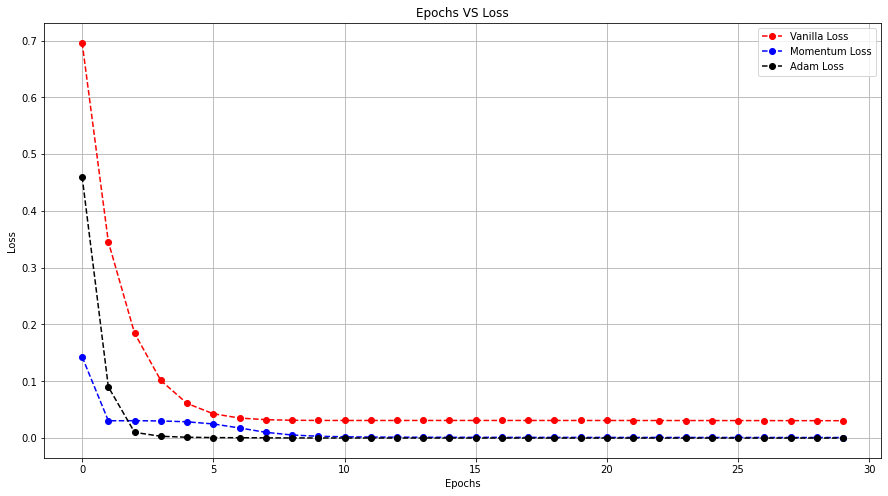

In [18]:
plt.figure(figsize=(15, 8))
plt.plot(opt.epochs, vanilla_loss, 'o--r', label='Vanilla Loss')
plt.plot(opt.epochs, momentum_loss, 'o--b', label='Momentum Loss')
plt.plot(opt.epochs, adam_loss, 'o--k', label='Adam Loss')
plt.title('Epochs VS Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

You can go through the following blog to understand the implementation of other optimizers. [Gradients update blog](https://cs231n.github.io/neural-networks-3/).

End of the file.